## Introduction

The data for this project comes from the OkCupid app. This is an online dating service, where users enter basic information about themselves and answer several multiple choice questions so that they can be matched to other users.

The goal of this project is to first review and clean the data, determine what data is available, and create a machine learning model to attempt matching users.

The data is provided from OkCupid and Codecademy as `profiles.csv`.

## Project Scoping



### Project Goals

### Data

### Analysis

### Evaluation









## Import Python Modules 

Includes initial modules expected to be utilized.

In [361]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



## Load Data and Review 

In [362]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [363]:
profiles.shape

(59946, 31)

In [364]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [365]:
profiles.age.dtypes

dtype('int64')

### Data Summary

From `profiles.shape` there are almost 60k rows with 31 columns 

The dataset column titles `profiles.columns` are:

- **age:** continuous variable in years (int64)
- **body_type:** categorical variable 
- **diet:** categorical variable
- **drinks:** categorical variable (alcohol consumption)
- **drugs:** categorical variable (drug usage)
- **education:** categorical variable

- **essay0:** "My self summary"
- **essay1:** "What I'm doing with my life"
- **essay2:** "What I'm really good at"
- **essay3:** "The first thing people notice about me"
- **essay4:** "Favorite books, movies, shows, music, and food"
- **essay5:** "The six things I could never do without"
- **essay6:** "I spend a lot of time thinking about..."
- **essay7:** "On a typical Friday night I am..."
- **essay8:** "The most private thing I am willing to admit"
- **essay9:** "You should message me if..."

- **ethnicity:** categorical variable
- **height:** continuous variable in inches (float64)
- **income:** continuous variable in USD assumed (int64)
- **job:** categorical variable (by inspection, from dropdown menu) 
- **last_online:** categorical variable
- **location:** categorical variable
- **offspring:** categorical variable
- **orientation:** categorical variable
- **pets:** categorical variable
- **religion:** categorical variable
- **sex:** categorical variable
- **sign:** categorical variable
- **smokes:** categorical variable
- **speaks:** categorical variable
- **status:** categorical variable


## Explore the data

For all columns with continuous variables, explore the number of unique responses and in some cases list those. Alphabetize the list when sorting (remove NaN first...)

In [366]:
object_cols = []
for column in profiles.columns:
    if profiles[column].dtypes == 'object':
        object_cols.append(column)
        print(f'Column {column.upper()} has {profiles[column].nunique()} categories')   
        

Column BODY_TYPE has 12 categories
Column DIET has 18 categories
Column DRINKS has 6 categories
Column DRUGS has 3 categories
Column EDUCATION has 32 categories
Column ESSAY0 has 54350 categories
Column ESSAY1 has 51516 categories
Column ESSAY2 has 48635 categories
Column ESSAY3 has 43533 categories
Column ESSAY4 has 49260 categories
Column ESSAY5 has 48963 categories
Column ESSAY6 has 43603 categories
Column ESSAY7 has 45554 categories
Column ESSAY8 has 39324 categories
Column ESSAY9 has 45443 categories
Column ETHNICITY has 217 categories
Column JOB has 21 categories
Column LAST_ONLINE has 30123 categories
Column LOCATION has 199 categories
Column OFFSPRING has 15 categories
Column ORIENTATION has 3 categories
Column PETS has 15 categories
Column RELIGION has 45 categories
Column SEX has 2 categories
Column SIGN has 48 categories
Column SMOKES has 5 categories
Column SPEAKS has 7647 categories
Column STATUS has 5 categories


In [367]:
def unique_entries(column):
    len_pre_nan = profiles[column].isnull().sum()
    clean_column = profiles[column].dropna()
    len_post = len(clean_column)
    col_entries = list(clean_column.unique())
    print(f'For column {column.upper()}, {len_post} entries remain after {len_pre_nan} NaNs deleted.')
    print(sorted(col_entries))

    
def unique_list(column):
    clean_column = profiles[column].dropna()
    col_entries = list(clean_column.unique())
    return col_entries


In [368]:
# unique_entries('body_type')

In [369]:
# unique_entries('diet')

In [370]:
# unique_entries('drinks')

In [371]:
# unique_entries('drugs')

In [490]:
# unique_entries('ethnicity')

In [373]:
# unique_entries('job')

In [374]:
# unique_entries('location')

In [375]:
# unique_entries('offspring')

In [376]:
# unique_entries('sex')

In [484]:
# unique_entries('religion')

In [378]:
# unique_entries('sign')

In [379]:
# unique_entries('speaks')

## Observations of Data

- Many columns such as `ethnicity`, `location`, `religion`, `sign` and `speaks` include large amounts of data that can be regrouped for clarity. Using a Bag of Words counter, it may be seen that in each of these cases terms are being repeated.
- The column for `location` may be split into city and state/country. A casual look at the data seems to indicate that there is a huge proportion of users from California. 


## Variables

### Ethnicity

In [380]:

from collections import Counter

tokens = (' '.join(unique_list('ethnicity'))).split()
print(Counter(tokens))


Counter({'asian,': 99, 'hispanic': 99, '/': 99, 'native': 94, 'black,': 93, 'other': 92, 'american,': 89, 'pacific': 81, 'latin,': 71, 'islander,': 68, 'middle': 64, 'white': 62, 'eastern,': 62, 'indian,': 55, 'white,': 52, 'latin': 28, 'islander': 13, 'indian': 10, 'american': 5, 'black': 4, 'eastern': 2, 'asian': 1})


## Variables

## Chi-Square Test

Analysis of significant association between variables.
 
- **Goal** Analysis of whether there is a relationship between how religious one describes oneself and self-described drug use and drinking.
- **Data** The data tables include the `religion`, `drugs`, `drinks`, and `smokes` columns.  
- **Process** The `religion` column will be divided into more strongly affiliated and less strongly affiliated with a belief.  The `drugs`, `drinks`, and `smokes` columns will be ordered and cleaned.
   - For religion: the new column will be `beliefs`. The entries '...and very serious about it', '...and somewhat serious about it', and the belief itself are to be categorized as 'strong belief'. Otherwise, the entries '...and not too serious about it', '...and laughing about it' are to be categorized as 'low belief'. 

In [496]:
# Drop null values from the following columns
profiles_rel = profiles.dropna(subset=['religion', 'drinks', 'drugs', 'smokes']).copy()
print(profiles_rel.shape)

# This function and the lambda immediately below create column 'belief' 
def check_for_text(str):
#     if (str.__contains__('not too') | str.__contains__('laughing')):
    if (str.__contains__('somewhat') | str.__contains__('very')):
        return True

profiles_rel['belief'] = profiles_rel.apply(lambda row: 'low belief' if check_for_text(row['religion']) else 'high belief', axis = 1)

# Sort the sortable categoricals: For 'religion', alphabetize then sort based on seriousness of belief. For the others, sort for
# how often the user drinks, uses drugs, or smokes.
profiles_rel['religion'] = pd.Categorical(profiles_rel['religion'],\
                        ['agnosticism and laughing about it',  'agnosticism but not too serious about it', \
                         'agnosticism', 'agnosticism and somewhat serious about it', 'agnosticism and very serious about it', \
                         'atheism and laughing about it', 'atheism but not too serious about it', \
                         'atheism', 'atheism and somewhat serious about it', 'atheism and very serious about it',  \
                         'buddhism and laughing about it', 'buddhism but not too serious about it', \
                         'buddhism', 'buddhism and somewhat serious about it', 'buddhism and very serious about it', \
                         'catholicism and laughing about it', 'catholicism but not too serious about it', \
                         'catholicism', 'catholicism and somewhat serious about it', 'catholicism and very serious about it', \
                         'christianity and laughing about it', 'christianity but not too serious about it',\
                         'christianity', 'christianity and somewhat serious about it', 'christianity and very serious about it',\
                         'hinduism and laughing about it', 'hinduism but not too serious about it', \
                         'hinduism', 'hinduism and somewhat serious about it', 'hinduism and very serious about it', \
                         'islam and laughing about it', 'islam but not too serious about it', \
                         'islam', 'islam and somewhat serious about it', 'islam and very serious about it', \
                         'judaism and laughing about it', 'judaism but not too serious about it', \
                         'judaism', 'judaism and somewhat serious about it', 'judaism and very serious about it', \
                         'other and laughing about it', 'other but not too serious about it', \
                         'other', 'other and somewhat serious about it', 'other and very serious about it'], ordered=True)
profiles_rel['drugs'] = pd.Categorical(profiles_rel['drugs'], ['never', 'sometimes', 'often'], ordered=True)
profiles_rel['drinks'] = pd.Categorical(profiles_rel['drinks'], ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], ordered=True)
profiles_rel['smokes'] = pd.Categorical(profiles_rel['smokes'], ['no', 'sometimes', 'when drinking', 'trying to quit', 'yes'], ordered=True)

from scipy.stats import chi2_contingency

ab_contingency = pd.crosstab(profiles_rel['drugs'], profiles_rel['belief'])
print(ab_contingency)
chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval)


(30094, 31)
belief     high belief  low belief
drugs                             
never            19802        4371
sometimes         4595        1033
often              208          85
8.965022305044359e-06


### Chi-Square Results

- **Conclusions** Comparing `belief` to `drugs`, `drinks`, and `smokes` pval suggests a correlation. As a test, comparing `religion` to `belief` shows pval = 0, or as expected no correlation. 

# Plots

### Religion

From the chi-square test above 53% of respondents describe their belief of choice as not very serious, while around 29% simply state a belief, and the remaining 18% are more serious about their belief. Per the plot below, for most of the individual beliefs '{belief} but not too serious about it' is the main choice of users. Agnosticism and Atheism are 37.5% of the population, Christianity and Catholicism are 29.6%, Judaism, Buddhism, Hinduism, and Islam are about 14.6%, and Other the remaining 19.2%.

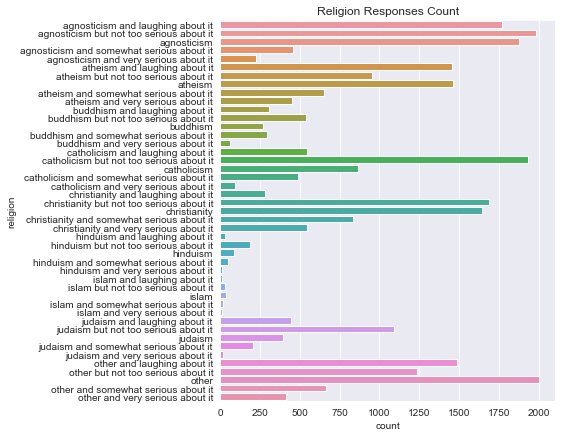

In [596]:
plt.figure(figsize=(6,7))
sns.set_style('darkgrid')
sns.countplot(data=profiles_rel, y='religion')
plt.title('Religion Responses Count')
plt.savefig('religions.png')

In [581]:
# Count totals for each belief
profiles_rel['belief_overall'] = profiles_rel.religion.str.split().str.get(0)
beliefs_overall = profiles_rel['belief_overall'].value_counts().sort_index().to_frame().reset_index()
beliefs_overall.columns = ['belief', 'count']
beliefs_overall['percent'] = beliefs_overall['count'].apply(lambda x: x/ len(profiles_rel['belief_overall'])*100)

print((beliefs_overall))


         belief  count    percent
0   agnosticism   6307  20.957666
1       atheism   4968  16.508274
2      buddhism   1464   4.864757
3   catholicism   3920  13.025852
4  christianity   4996  16.601316
5      hinduism    375   1.246096
6         islam    110   0.365521
7       judaism   2156   7.164219
8         other   5798  19.266299


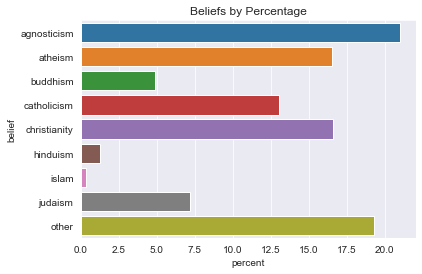

In [602]:
sns.barplot(x=beliefs_overall['percent'], y=beliefs_overall['belief'])
plt.title('Beliefs by Percentage')
plt.savefig('belief_overall.png')
plt.show()

### Ethnicity

The plots show that the vast majority of users are self-described as 'white', followed far behind by 'asian', 'hispanic/latin', and 'black'. Although it may be possible to create subgroups of the remain

<AxesSubplot:xlabel='count', ylabel='ethnicity'>

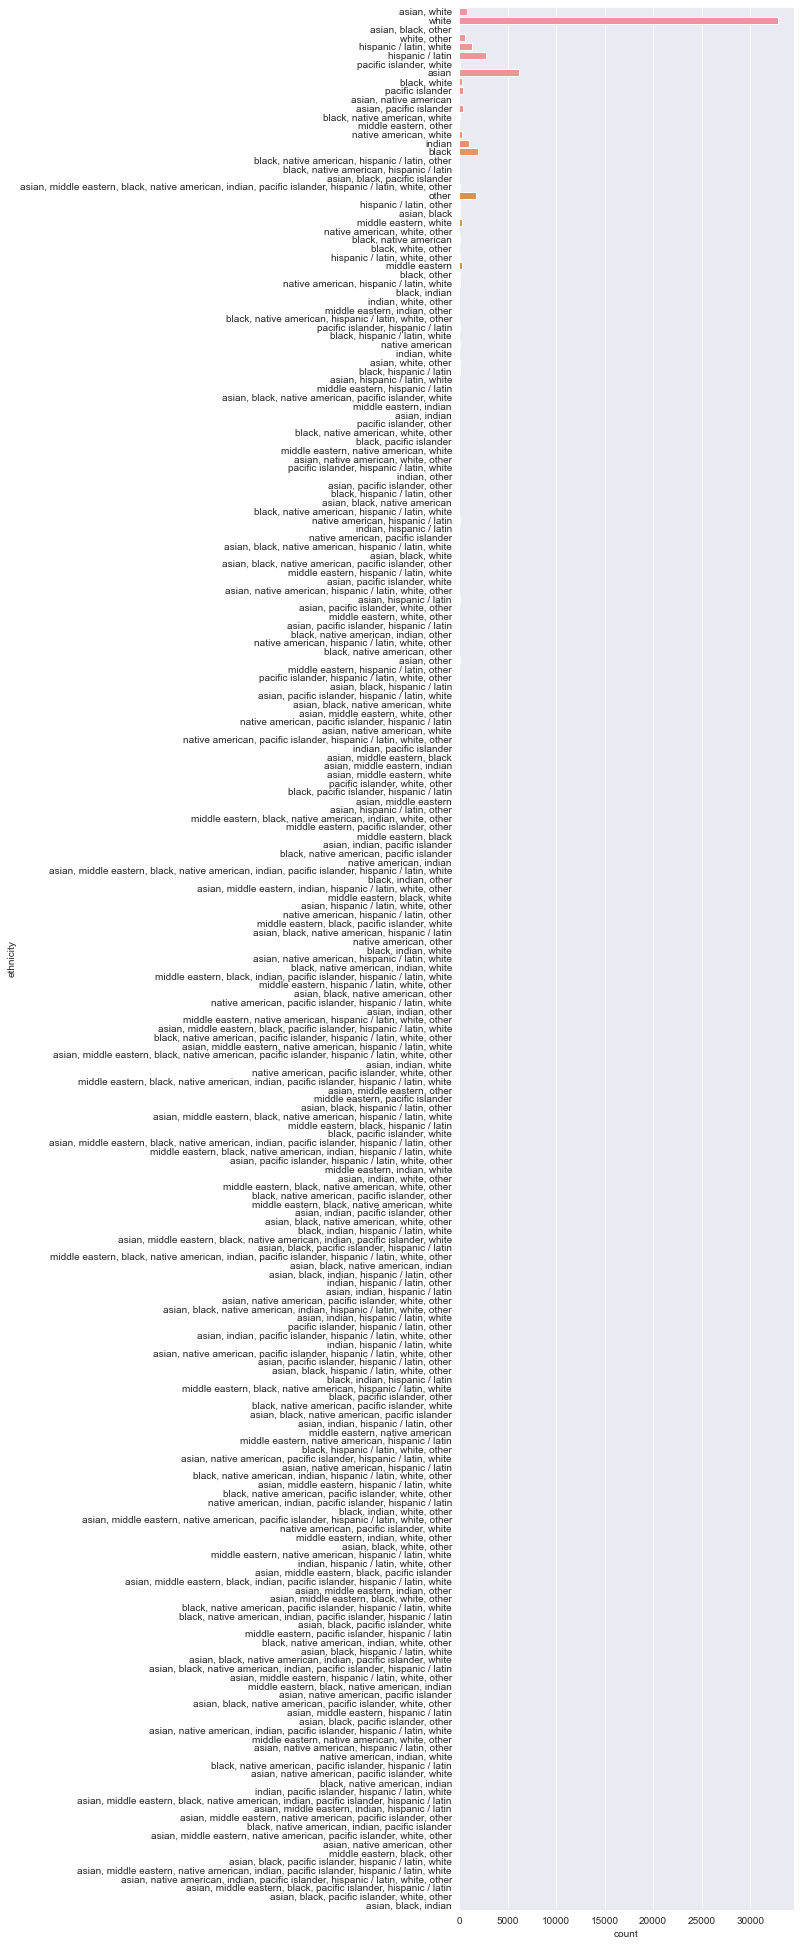

In [601]:
plt.figure(figsize=(6,35))
sns.countplot(data=profiles, y='ethnicity')
# plt.savefig('ethinicity.png')

In [ ]:


profiles_rel['ethnic_overall'] = profiles_rel.ethinicity.str.split().str.get(0)
ethnic_overall = profiles_rel['belief_overall'].value_counts().sort_index().to_frame().reset_index()
beliefs_overall.columns = ['belief', 'count']
beliefs_overall['percent'] = beliefs_overall['count'].apply(lambda x: x/ len(profiles_rel['belief_overall'])*100)

print((beliefs_overall))

##  Natural Language Processing

Use scikit-learn's bag-of-words and Naive Bayes classifier to determine the author of a writing selection.

- **Goal** There are 10 essay-type answers that each user submitted when creating their profile. The goal will be to select 10 users at random and use a random selection of 8 of their essay answers in order to train the model. Then given  9 and 10th essays, see how accurately the model can guess the correct user.
- **Data** As noted, data will be `essay0` through `essay9` from 10 random users. 
- **Analysis** The analysis will use scikit-learn's bag-of-words and Naive Bayes classifier. The 10 random users will need to have answered all 10 essay questions so that we don't inadvertently have NaNs to clog up the model. 

In [11]:
# Copy profiles dataset, and drop all rows with any null values in any of the essay questions. 

profiles_essays = profiles[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', \
                            'essay5', 'essay6', 'essay7', 'essay8', 'essay9',]].dropna()

# Check remaining users. NOTE- from .shape, 29866 users answered all ten essays. OK to proceed. 
print(profiles_essays.shape)

(29866, 10)


In [221]:
# Select 10 random users using built-in `.sample` method, then for each select 9 essays to train the model. We might be 
# able to use .sample again to select random columns, but instead use random indexes so that we can keep track. Use the
# remaining essay to predict who the author is.


training_essays = []
test_essays = []
user_labels = []
test_labels = []
ten_users = profiles_essays.sample(n=10).reset_index(drop=True)
print(ten_users.shape)
for i in range(len(ten_users)):
    rand_index = np.random.randint(10, size = 1)
#     if rand_index[0] == rand_index[1]:
#         rand_index[1] = (rand_index[0] + 3)%10
    
    for j in range(len(ten_users.columns)):        
        if j not in rand_index:
            training_essays.append(ten_users.iloc[i, j])
            user_labels.append(i)
        else:
            test_essays.append(ten_users.iloc[i, j])
            test_labels.append(i)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

bow_vectorizer = CountVectorizer()
user_vectors = bow_vectorizer.fit_transform(training_essays)

user_classifier = MultinomialNB()
user_classifier.fit(user_vectors, user_labels)

correct = 0
for i in range(10):
    test_vector = bow_vectorizer.transform([test_essays[i]])
    prediction = user_classifier.predict(test_vector)
    if prediction == i:
        print(f'For index {i} predicted {prediction}: MATCH!!!')
        correct += .1        
    else:
        print(f'For index {i} predicted {prediction}')
    
print(f'Correct ratio is: {correct}')

(3, 10)
For index 0 predicted [1]
For index 1 predicted [1]: MATCH!!!
For index 2 predicted [2]: MATCH!!!
Correct ratio is: 0.2


### Natural Language Processing

- **Conclusions** After running the classifier ten times, the classifier consistently made the correct classification an average of 1.8 times out of 10, which is *slightly* better performance than random guessing. Of course, the solution for better classifications would be to train the model with far more data than the ten essays here. 

In [5]:
print(profiles['essay6'][999])

the point of the sleeveless turtleneck<br />
why people honk so much (not at me)<br />
whether i should leverage my skills into something i can do
overseas and practice my spanish


In [6]:
print(profiles['essay7'][999])

nan


In [7]:
print(profiles['essay7'][998])

nan
